### Required

- For Mac, download AMS fonts in the OTF format from https://github.com/Happypig375/AMSFonts-Ttf-Otf
 and paste it into Library/Fonts

- When generating latex code, include latex_preambles as:
```python
sty_path = os.getcwd() + "/custom-definitions"

latex_preamble = [
    r'\usepackage{{amsmath}}',
    rf'\usepackage{{{sty_path}}}',
    r'\usepackage[OT1]{fontenc}'
]

plt.rcParams.update({
    "text.usetex": True,
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'text.latex.preamble': '\n'.join(latex_preamble),
    # "font.family": "serif",
    # "font.sans-serif": "Times",  # Neurips font
    # 'font.size': 12
})
# mpl.rcParams['text.latex.preamble'] = '\n'.join(latex_preamble)
```

- It is essential to use ```\usepackage[OT1]{fontenc}``` encoding instead of ```[T1]```. 

- Save it in ```.svg``` format, ```.pdf``` format does not work in Illustrator.

In [7]:
import os
from typing import List

import numpy as np
import matplotlib.pyplot as plt

sty_path = os.getcwd() + "/custom-definitions"

latex_preamble = [
    rf'\usepackage{{{sty_path}}}',
    r'\usepackage[OT1]{fontenc}'
]

plt.rcParams.update({
    "text.usetex": True,
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'text.latex.preamble': '\n'.join(latex_preamble),
    # "font.family": "serif",
    # "font.sans-serif": "Times",  # Neurips font
    # 'font.size': 12
})

# mpl.rcParams['text.latex.preamble'] = '\n'.join(latex_preamble)

In [8]:
def get_latex_code(latex_list: List[str], env: str = "aligned"):

    import re

    text = "\\\[15pt] \n".join(latex_list)
    # print(text)

    if env == "aligned":
        text = rf"""$$
        \begin{{{env}}}
            {text}
        \end{{{env}}}
        $$"""

    elif env == "align":
        text = rf"""
        \begin{{{env}*}}
            {text}
        \end{{{env}*}}
        """

    elif env == "alignat":
        text = rf"""
        \begin{{{env}*}}{{{2}}}
            {text}
        \end{{{env}*}}
        """

    else:
        raise ValueError(f"Environment {env} not supported")

    text = text.replace("\n", "")
    text = re.sub(r"\s+", ' ', text)

    return text


def generate_latex(latex_list,
                   env: str = "aligned",
                   format: str = "svg",
                   save_path: str = "./"):

    assert env in ["aligned", "align", "alignat"], "Environment must be either aligned, align or alignat"
    assert format in ["svg", "pdf", "png"], "Format must be either svg, pdf or png"

    if isinstance(latex_list, str):
        latex_list = [latex_list]

    text = get_latex_code(latex_list, env=env)

    fig, ax = plt.subplots(figsize=(10, 1))
    ax.text(0, 0, text, fontsize=45, ha='left', va='center')
    ax.axis('off')

    # Save the figure as a SVG file
    filename = os.path.join(save_path, f"latex_equation.{format}")
    plt.savefig(filename, dpi=300, bbox_inches='tight', format=format)

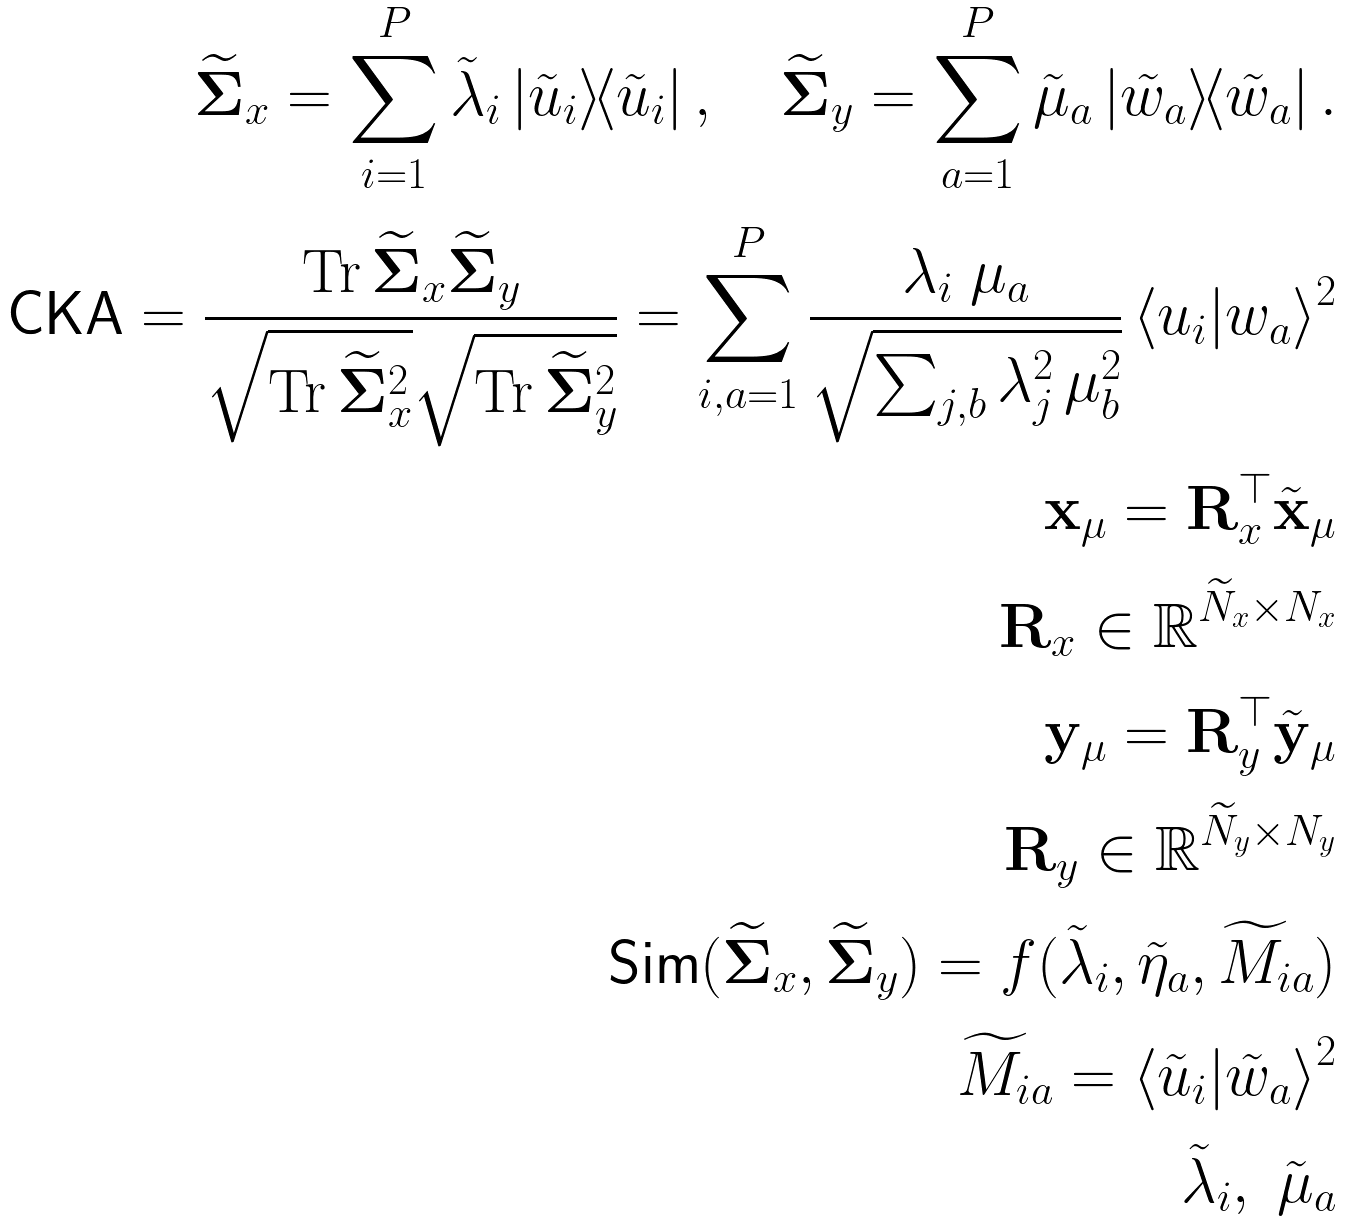

In [10]:
latex_list = [
    r"\widetilde\bSigma_x = \sum_{i=1}^{P} \tilde\lambda_i \ketbra{\tilde u_i}{\tilde u_i}, \quad "
    r"\widetilde\bSigma_y = \sum_{a=1}^{P} \tilde\mu_a \ketbra{\tilde{w}_a}{\tilde w_a}.",

    r"\text{CKA} = \frac{\Tr \widetilde\bSigma_x\widetilde\bSigma_y}"
    r"{\sqrt{\Tr \widetilde\bSigma_x^2} \sqrt {\Tr\widetilde\bSigma_y^2}} = "
    r"\sum_{i, a=1}^{P}\frac{\lambda_i \; \mu_a}{\sqrt{\sum_{j, b} \lambda_j^2\, \mu_b^2}}\braket{u_i | w_a}^2",

    r"\x_\mu = \R_x^\top \tilde\x_\mu",

    r"\R_x \in \bR^{\widetilde N_x \times N_x}",

    r"\y_\mu = \R_y^\top \tilde\y_\mu",

    r"\R_y \in \bR^{\widetilde N_y \times N_y}",

    r"\text{Sim}(\widetilde\bSigma_x, \widetilde\bSigma_y) = "
    r"f(\tilde\lambda_i, \tilde\eta_a, \widetilde M_{ia})",

    r"\widetilde M_{ia} = \braket{\tilde u_i |\tilde w_a}^2",

    r"\tilde\lambda_i,\; \tilde\mu_a",
]

format = "svg"
env = "aligned"
# env = "align"
# env = "alignat"

generate_latex(latex_list, env=env, format=format)

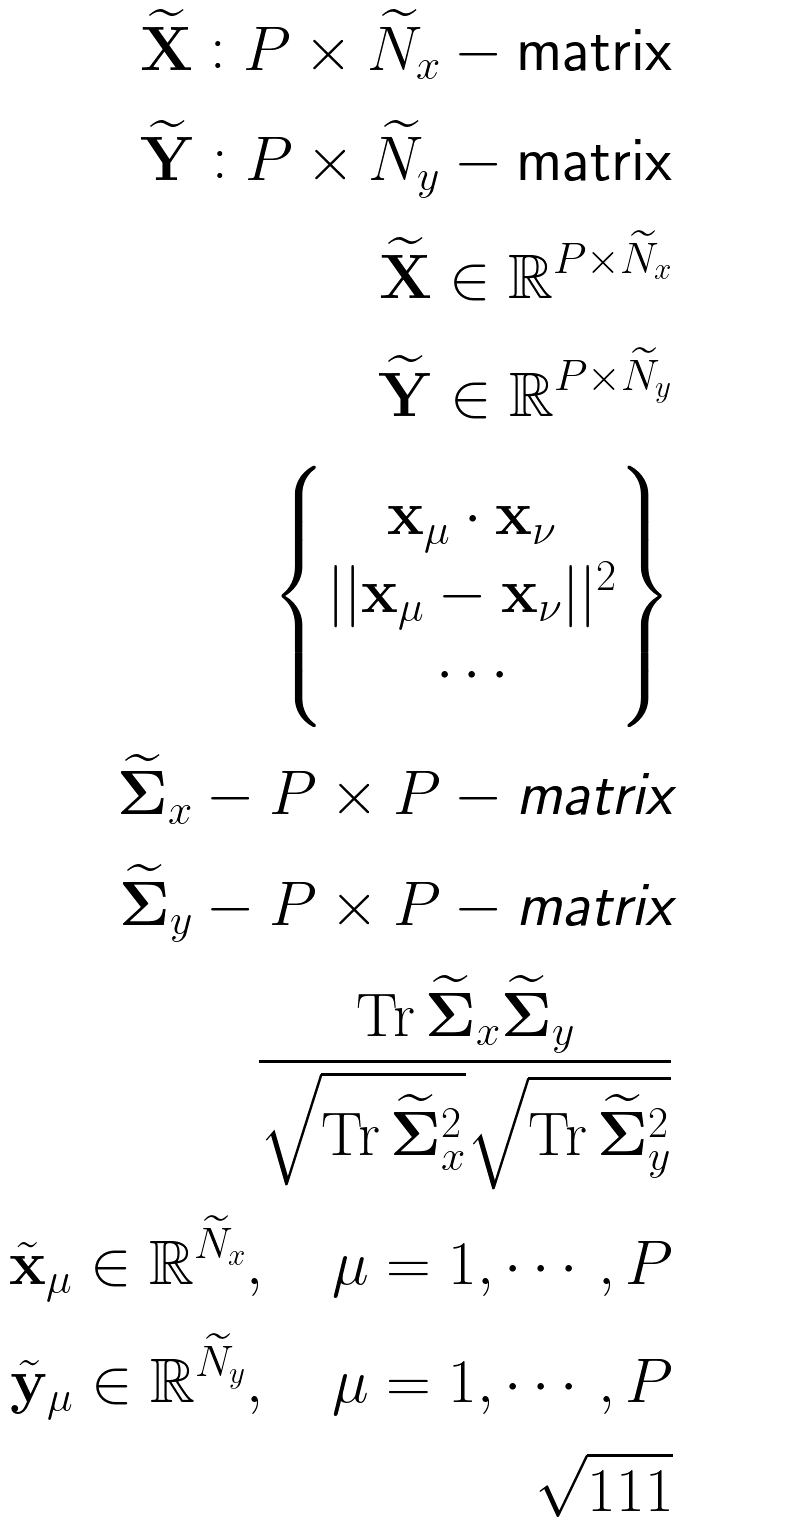

In [15]:
latex_list = [
    r"\widetilde\X: P \times \widetilde N_x - \text{matrix}",
    r"\widetilde\Y: P \times \widetilde N_y - \text{matrix}",
    r"\widetilde\X \in \bR^{P \times \widetilde N_x}",
    r"\widetilde\Y \in \bR^{P \times \widetilde N_y}",
    r"\begin{Bmatrix} \x_\mu \cdot\x_\nu \\||\x_\mu-\x_\nu||^2 \\ \cdots \end{Bmatrix}",
    r"\widetilde\bSigma_x - P\times P - \textit{matrix}",
    r"\widetilde\bSigma_y - P\times P - \textit{matrix}",
    r"\frac{\Tr \widetilde\bSigma_x\widetilde\bSigma_y}{\sqrt{\Tr \widetilde\bSigma_x^2} \sqrt {\Tr\widetilde\bSigma_y^2}}",
    r"\tilde\x_\mu \in \bR^{\widetilde N_x}, \quad \mu = 1, \cdots, P",
    r"\tilde\y_\mu \in \bR^{\widetilde N_y}, \quad \mu = 1, \cdots, P",
    r"\sqrt{111} "
]

format = "svg"
env = "aligned"
# env = "align"
# env = "alignat"

generate_latex(latex_list, env=env, format=format)

' $$\\begin{aligned} Q^{x}_{ij} &:= \\mathbb{E}[\\braket{u_i|\\tilde u_j}^2] \\quad &&\\text{(brain\\_1 sample vs population)}\\nonumber\\\\\\\\[15pt] Q^{y}_{ab} &:= \\mathbb{E}[\\braket{w_a|\\tilde w_b}^2] \\quad &&\\text{(brain\\_2 sample vs population)}\\nonumber\\\\\\\\[15pt] \\\\\\\\[15pt] M_{ia} &:= \\mathbb{E}[\\braket{u_i|w_a}^2] \\quad &&\\text{(brain\\_1 vs brain\\_2 sample)}\\nonumber\\\\\\\\[15pt] \\tilde{M}_{ia} &:= \\braket{\\tilde u_i|\\tilde w_a}^2 \\quad &&\\text{(brain\\_1 vs brain\\_2 population)} \\end{aligned} $$'

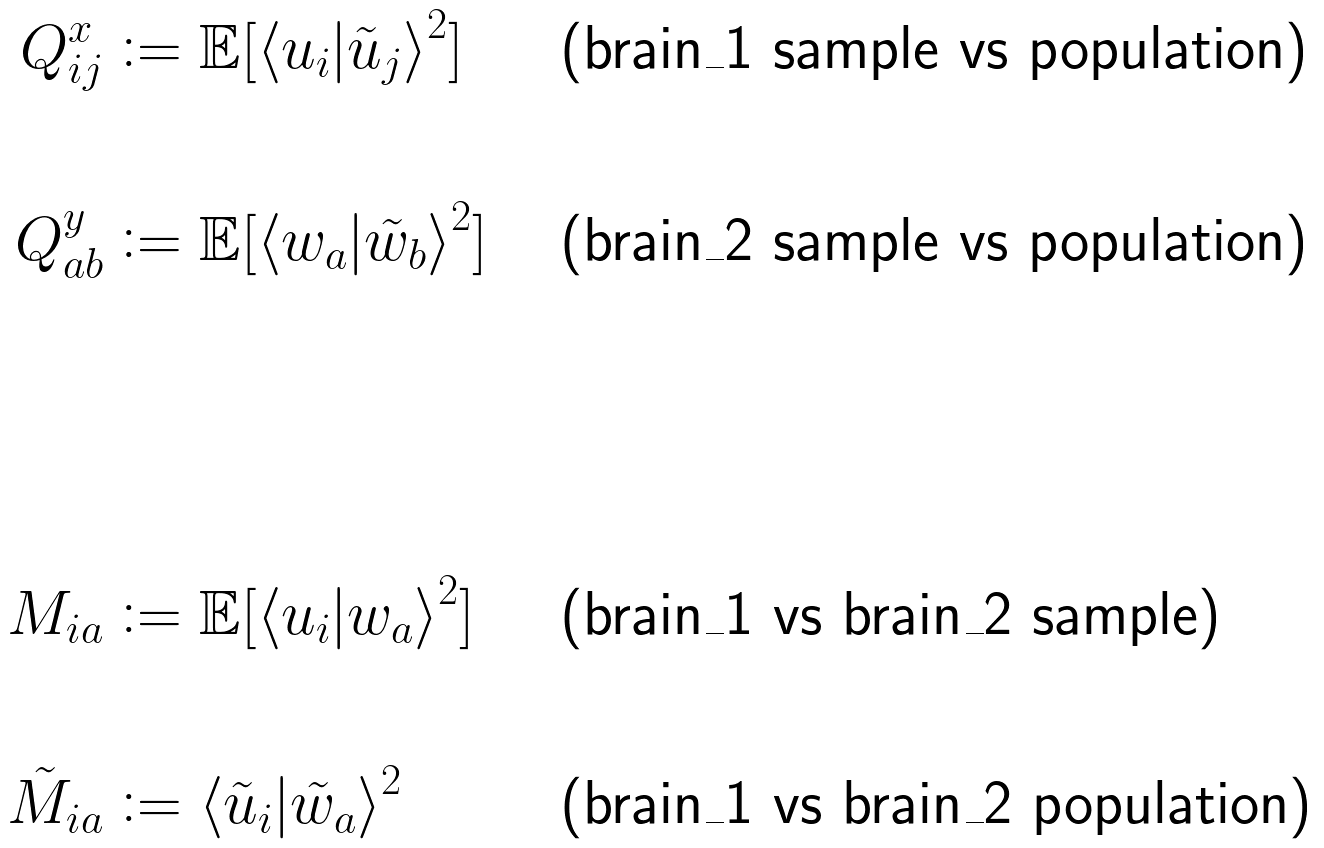

In [5]:
latex_list = [
    r"Q^{x}_{ij} &:= \mathbb{E}[\braket{u_i|\tilde u_j}^2] \quad &&\text{(brain\_1 sample vs population)}\nonumber\\",
    r"Q^{y}_{ab} &:= \mathbb{E}[\braket{w_a|\tilde w_b}^2] \quad &&\text{(brain\_2 sample vs population)}\nonumber\\",
    r"\\",
    r"M_{ia} &:= \mathbb{E}[\braket{u_i|w_a}^2] \quad &&\text{(brain\_1 vs brain\_2 sample)}\nonumber\\",
    r"\tilde{M}_{ia} &:= \braket{\tilde u_i|\tilde w_a}^2 \quad &&\text{(brain\_1 vs brain\_2 population)}",
]

env = "aligned"
# env = "align"
# env = "alignat"

generate_latex(latex_list, env=env)